**Question:**

On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

Think about what could be going wrong with our calculation. Think about a better way to evaluate this data. 
What metric would you report for this dataset?
What is its value?

**Step 1:**  We first import and read the csv in order to analyze the discrepancy

In [1]:
# Import dependencies
import pandas as pd

In [2]:
# Read the data csv
data = pd.read_csv("2019 Winter Data Science Intern Challenge Data Set - Sheet1.csv")

In [3]:
# View the dataframe
data.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


**Step 2:** Since Average Order Value (AOV) equates to total order value divided by number of orders, we will analyze the "order_amount" column of the dataframe, using the describe function

In [6]:
data["order_amount"].describe()

count      5000.000000
mean       3145.128000
std       41282.539349
min          90.000000
25%         163.000000
50%         284.000000
75%         390.000000
max      704000.000000
Name: order_amount, dtype: float64

**Insight:**

* The describe function above shows that the originally calculated AOV actually corresponds to the mean ($3145.13)
* Further, the standard deviation is very high, at 41282.54. The range of values is varied, as the min value is 90 and max value is 704000, which would result in a skewed mean value

**Step 3:** We would need to further analyze the dataset, in order to ascertain whether there are any outliers, and how many if there are

In [7]:
# Sort the dataframe in descending order in order to view the max values
sorted_data = data.sort_values(by='order_amount', ascending=False)
sorted_data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
3332,3333,42,607,704000,2000,credit_card,2017-03-24 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
...,...,...,...,...,...,...,...
3871,3872,92,818,90,1,debit,2017-03-18 9:10:08
2503,2504,92,935,90,1,credit_card,2017-03-28 2:30:26
4414,4415,92,927,90,1,credit_card,2017-03-17 9:57:01
3363,3364,92,730,90,1,credit_card,2017-03-11 23:20:31


In [17]:
# Apply groupby function and count the instances of high values
grouped_sorted_data = sorted_data.groupby(['order_amount']).count().sort_values(by='order_amount', ascending=False)
grouped_sorted_data.head(10)

,order_id,shop_id,user_id,total_items,payment_method,created_at
order_amount,,,,,,
704000,17,17,17,17,17,17
154350,1,1,1,1,1,1
102900,1,1,1,1,1,1
77175,9,9,9,9,9,9
51450,16,16,16,16,16,16
25725,19,19,19,19,19,19
1760,1,1,1,1,1,1
1408,2,2,2,2,2,2
1086,1,1,1,1,1,1


In [33]:
# Filter the outlier values from the original dataframe to derive further insights
outliers = [704000, 154350, 102900, 77175, 51450, 25725]
filtered_data = data[data['order_amount'].isin(outliers)]
# filtered_data = data.loc[data['order_amount'] == 51450]
filtered_data

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
...,...,...,...,...,...,...,...
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4715,4716,78,818,77175,3,debit,2017-03-05 5:10:44
4868,4869,42,607,704000,2000,credit_card,2017-03-22 4:00:00
4882,4883,42,607,704000,2000,credit_card,2017-03-25 4:00:00


**Insight:**

* On sorting the dataframe, we see that there have been multiple transactions of large amounts (704000, 154350, 102900, 77175, 51450, 25725), which are driving up the AOV
* When we groupby the order amount and apply count function, we arrive at the number of such transactions
* On filtering out the outlier values, we get more details of the transactions. Some cases consisted of 2000 items purchased from a single store at the same time across the period analyzed; while in other cases, a single item was recorded as high as $25725
* Hence, these can be attributed to an anomaly in the system

**Step 4:** Visualizing the distribution of data

array([[<AxesSubplot:title={'center':'order_amount'}>]], dtype=object)

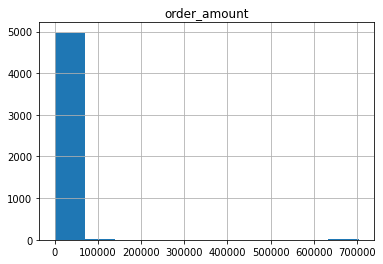

In [19]:
# Create a histogram in order to visualize how the data is distributed and to further drive our analysis
data.hist(column='order_amount')

**Insight:**
The histogram reveals a skewed dataset, which was also determined in the above analysis, due to anomalies in certain purchase transactions. Hence, mean would not be the correct metric for evaluating AOV

It would make sense to use a metric such as Median which is less affected by outliers and skewed data

In [34]:
# Calculate median
data['order_amount'].median()

284.0

The median is $284, which appears to be a more reasonable estimate of AOV, given that the products being analyzed are lower-priced sneakers